In [1]:
import down_data
import importlib
importlib.reload(down_data)
import pandas as pd
import time

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.options.display.max_colwidth = 100
%matplotlib inline

In [2]:
def extract_coin_columns(df, coin_name):
    return df.loc[:, df.columns.str.endswith('_' + coin_name)]

def plot_coin(df):
    coin_name = df.columns[0].split('_')[1]
    
    ax = df.loc[:, df.columns.str.startswith('open')].plot(figsize=(20,10), title=coin_name, style='.-')
    ax = df.loc[:, df.columns.str.startswith('close')].plot(figsize=(20,10), ax=ax, style='.-')
    ax = df.loc[:, df.columns.str.startswith('high')].plot(figsize=(20,10), ax=ax, style='.-')
    df.loc[:, df.columns.str.startswith('low')].plot(figsize=(20,10), ax=ax, style='.-')

In [3]:
coins_list_btc_small = ['SYS','BCN','DGB']
coins_list_btc = ['SYS','BCN','DGB','LBC','NOTE','PASC','NAUT','SC','NEOS','ETH','ZEC','MAID','XRP',
                  'BTS','XEM','SBD','STRAT','LTC','AMP','BCY','ETC','ARDR','POT','NXT','BELA','XBC',
                  'BTCD','XMR','NXC','XCP','DCR','BLK','RIC','STEEM','NMC','PINK','OMNI','SJCX','NAV']

In [4]:
down = down_data.Downloader()

In [25]:
df_big = pd.DataFrame()
df_small = pd.DataFrame
coin_btc_previous = ''
limit = 2000
aggregate = 1
counter = 0

for coin_btc in coins_list_btc:
    counter += 1
    print(coin_btc, counter, len(coins_list_btc))
    histo = down.get_histohour_json(coin_btc, 'BTC', limit=limit, aggregate=aggregate)
    if len(df_big) == 0:
        df_big = pd.DataFrame(histo['Data']).add_suffix('_' + coin_btc).rename(columns={'time_'+coin_btc:'time'})
    else:
        df_small = pd.DataFrame(histo['Data']).add_suffix('_' + coin_btc).rename(columns={'time_'+coin_btc:'time'})
        df_big = pd.merge(df_big, df_small, on='time')
    time.sleep(0.5)
df_big = df_big.set_index('time')

SYS 1 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=SYS&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
BCN 2 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=BCN&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
DGB 3 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=DGB&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
LBC 4 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=LBC&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
NOTE 5 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=NOTE&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
PASC 6 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=PASC&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
NAUT 7 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=NAUT&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
SC 8 39
get_histohour request: https://min-api.cryptocom

In [28]:
df_big.head()

,close_SYS,high_SYS,low_SYS,open_SYS,volumefrom_SYS,volumeto_SYS,close_BCN,high_BCN,low_BCN,open_BCN,...,low_SJCX,open_SJCX,volumefrom_SJCX,volumeto_SJCX,close_NAV,high_NAV,low_NAV,open_NAV,volumefrom_NAV,volumeto_NAV
time,,,,,,,,,,,,,,,,,,,,,
1497423600,0.000073,0.000073,0.000072,0.000073,357804.01,26.03,0.000001,0.000001,0.000001,0.000001,...,0.000414,0.000419,10025.27,4.19,0.000143,0.000146,0.000143,0.000143,17847.42,2.58
1497427200,0.000076,0.000079,0.000073,0.000073,1398353.93,105.02,0.000001,0.000001,0.000001,0.000001,...,0.000414,0.000418,6417.21,2.66,0.000143,0.000146,0.000143,0.000143,18228.92,2.63
1497430800,0.000079,0.000079,0.000074,0.000076,1060164.43,80.64,0.000001,0.000001,0.000001,0.000001,...,0.000411,0.000417,33860.82,14.02,0.000146,0.000148,0.000143,0.000143,20369.66,2.98
1497434400,0.000081,0.000083,0.000077,0.000079,3336974.36,267.91,0.000001,0.000001,0.000001,0.000001,...,0.000410,0.000411,47241.72,19.66,0.000147,0.000151,0.000145,0.000146,74041.75,11.02
1497438000,0.000080,0.000081,0.000076,0.000081,2304033.23,182.89,0.000001,0.000001,0.000001,0.000001,...,0.000408,0.000416,8666.39,3.56,0.000151,0.000151,0.000147,0.000147,8590.37,1.28


In [20]:
df_bcn = extract_coin_columns(df=df_big, coin_name='BCN')

In [21]:
df_bcn

,close_BCN,high_BCN,low_BCN,open_BCN,volumefrom_BCN,volumeto_BCN
time,,,,,,
1497423600,1.220000e-06,1.230000e-06,1.210000e-06,1.220000e-06,13190626.92,16.13
1497427200,1.220000e-06,1.230000e-06,1.210000e-06,1.220000e-06,10498942.50,12.75
1497430800,1.210000e-06,1.230000e-06,1.210000e-06,1.220000e-06,8736722.86,10.63
1497434400,1.240000e-06,1.250000e-06,1.210000e-06,1.210000e-06,24574470.35,30.05
1497438000,1.220000e-06,1.250000e-06,1.210000e-06,1.240000e-06,26868453.57,32.81
1497441600,1.210000e-06,1.230000e-06,1.200000e-06,1.220000e-06,40064617.49,48.60
1497445200,1.200000e-06,1.220000e-06,1.180000e-06,1.210000e-06,31347013.68,37.60
1497448800,1.190000e-06,1.210000e-06,1.160000e-06,1.200000e-06,46733509.49,55.20
1497452400,1.210000e-06,1.210000e-06,1.170000e-06,1.190000e-06,25827886.27,30.63


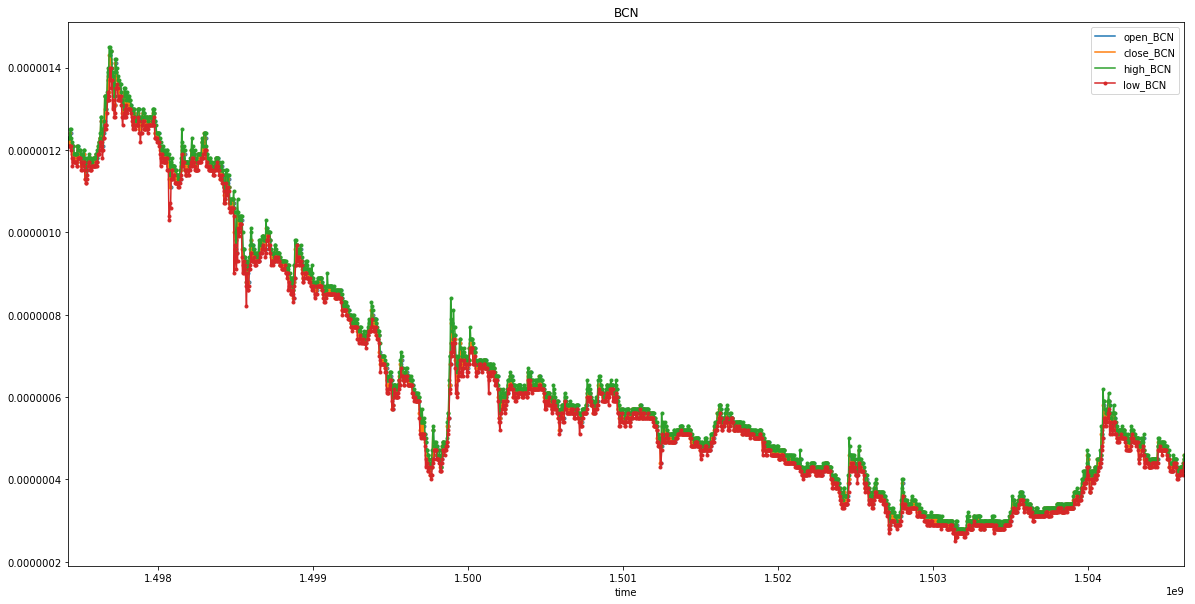

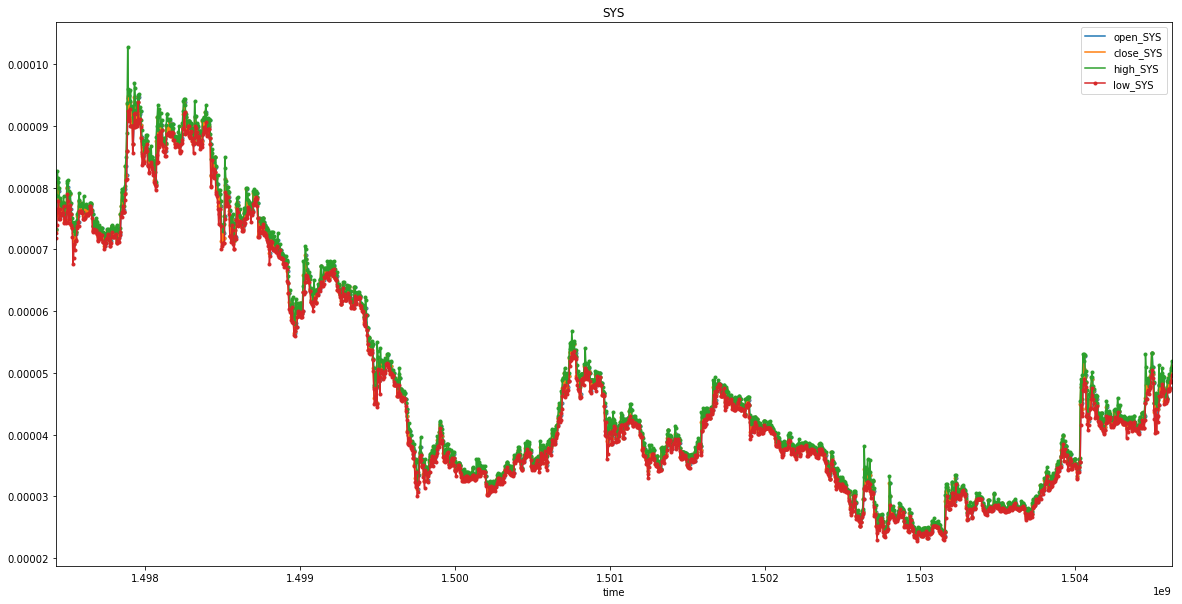

In [30]:
plot_coin(extract_coin_columns(df=df_big, coin_name='BCN'))
plot_coin(extract_coin_columns(df=df_big, coin_name='SYS'))